<a href="https://colab.research.google.com/github/kimgoinghard/study-machine-learning/blob/main/study_torch_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

#Cost Function(비용함수) 
- 손실함수
- 오차함수
- 목적함수

비용함수를 최소화 하는 매개변수를 구함으로서 데이터를 가장 잘 나타내는 직선을 구하는 방법이 선형회귀.

앞에서 이야기한 비용함수를 최적화하는 방법들 중 Optimizer(최적화) 알고리즘을 사용할 것이다.. 가장 기본적인 optimizer 방법인 Gradient Descent(경사하강법)을 공부해보았다.

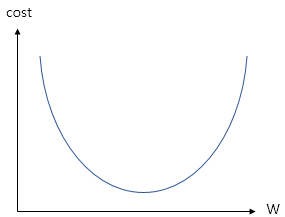

위의 그림은 우리가 찾으려는 매개변수 W, 즉 기울기에 따른 비용함수의 그래프이다. (절편은 생략하였다.)

방법은 이와 같다. 
1. 임의의 초기값 W를 설정한다.
2. 현재 W에서의 기울기를 구한다. 
3. 양수라면 W값을 감소시키고, 음수라면 W값을 증가시킨다. 
4. 1~3의 과정을 기울기가 0과 아주 가까워질 때 까지 반복한다. 

이 과정에서 고려해야할 것이 하나 더 있는데, 바로 어느 정도의 크기로 W값을 수정해야하는가 이다. 이를 Learing Rate(학습률) 이라고 부르며, 너무 크게 되면 W값이 발산하게 되고, 너무 작으면 학습속도가 느려지게 되어 적절한 값을 찾아주어야 한다. 

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
x_train = torch.FloatTensor([[1], [2], [3]]) #공부시간
y_train = torch.FloatTensor([[2], [4], [6]]) #점수

In [13]:
print(x_train.shape) #(3,1)
print(x_train)

print(y_train.shape) #(3,1)
print(y_train)

torch.Size([3, 1])
tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])


In [14]:
#매개변수 초기화
W = torch.zeros(1, requires_grad=True) #학습을 통해 값이 변경가능하다는 것.
print(W)

tensor([0.], requires_grad=True)


In [15]:
b = torch.zeros(1, requires_grad = True)

현재 직선의 방정식 
#y = 0 * x + 0#


In [17]:
hypothesis = x_train * W + b 
print(hypothesis) #현재 매개변수들에 의한 직선의 방정식, 귀무가설에 해당함.

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [22]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [29]:
lr = 0.01 #학습률
optimizer = optim.SGD([W,b], lr) #SGD : Stochastic Gradient Descent(확률적 경사 하강법) / optimizer는 SGD객체.

In [46]:
#optimizer.zero_grad()  #미분해서 얻은 기울기를 0으로 초기화한다. 그래야 매개변수를 수정한 뒤에 또 새로운 매개변수를 구해나갈 수 있음.
#cost.backward() #비용함수를 미분하여 W와 b를 계산한다.(역전파 이용)
#optimizer.step() #backward()를 통해 계산한 매개변수를 update하는 과정

In [44]:
n_epochs = 2000
for epoch in range(n_epochs+1):

  hypothesis = x_train*W + b

  cost = torch.mean((hypothesis - y_train)**2)

  optimizer.zero_grad() #0으로 초기화
  cost.backward() #역전파 신호로 매개변수 계산
  optimizer.step() #계산된 매개변수 업데이트
      
  if epoch%100 ==0:
    print('Epoch {0} / W : {1} / b : {2} / Cost : {3}'.format(epoch, W.item(), b.item(), cost.item() ))
  

Epoch 0 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 100 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 200 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 300 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 400 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 500 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 600 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 700 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 800 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 900 / W : 1.9999957084655762 / b : 8.701807018951513e-06 / Cost : 1.2278178473934531e-11
Epoch 1000 / W : 1.9999957084655762 / b : 8.70180701

#optimizer.zero_grad() 의 역할

In [50]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs):
  z = 2 * w
  z.backward()
  print('수식을 w로 미분한 값 : {0}'.format(w.grad))

#계속 2가 누적되는 것을 볼 수 있다. 따라서 optimizer.zero_grad()를 통해서 0으로 초기화 시켜주어야 한다. 


수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
